![](image.jpg)

Dive into the heart of data science with a project that combines healthcare insights and predictive analytics. As a Data Scientist at a top Health Insurance company, you have the opportunity to predict customer healthcare costs using the power of machine learning. Your insights will help tailor services and guide customers in planning their healthcare expenses more effectively.

## Dataset Summary

Meet your primary tool: the `insurance.csv` dataset. Packed with information on health insurance customers, this dataset is your key to unlocking patterns in healthcare costs. Here's what you need to know about the data you'll be working with:

## insurance.csv

| Column     | Data Type | Description                                                              |
| ---------- | --------- | ------------------------------------------------------------------------ |
| `age`      | int       | Age of the primary beneficiary.                                          |
| `sex`      | object    | Gender of the insurance contractor (male or female).                     |
| `bmi`      | float     | Body mass index, a key indicator of body fat based on height and weight. |
| `children` | int       | Number of dependents covered by the insurance plan.                      |
| `smoker`   | object    | Indicates whether the beneficiary smokes (yes or no).                    |
| `region`   | object    | The beneficiary's residential area in the US, divided into four regions. |
| `charges`  | float     | Individual medical costs billed by health insurance.                     |

A bit of data cleaning is key to ensure the dataset is ready for modeling. Once your model is built using the `insurance.csv` dataset, the next step is to apply it to the `validation_data_data_data_data_data_data_data_data_data_data_data_data_data_data_data_data_data_dataset.csv`. This new dataset, similar to your training data minus the `charges` column, tests your model's accuracy and real-world utility by predicting costs for new customers.

## Let's Get Started!

This project is your playground for applying data science in a meaningful way, offering insights that have real-world applications. Ready to explore the data and uncover insights that could revolutionize healthcare planning? Let's begin this exciting journey!


In [660]:
# Import required libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

# Loading the insurance dataset
insurance_data_path = './data/insurance.csv'
insurance = pd.read_csv(insurance_data_path)
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19.0,female,27.900,0.0,yes,southwest,16884.924
1,18.0,male,33.770,1.0,no,Southeast,1725.5523
2,28.0,male,33.000,3.0,no,southeast,$4449.462
3,33.0,male,22.705,0.0,no,northwest,$21984.47061
4,32.0,male,28.880,0.0,no,northwest,$3866.8552


In [661]:
insurance.shape

(1338, 7)

In [662]:
insurance.describe()

,age,bmi,children
count,1272.000000,1272.000000,1272.000000
mean,35.214623,30.560550,0.948899
std,22.478251,6.095573,1.303532
min,-64.000000,15.960000,-4.000000
25%,24.750000,26.180000,0.000000
50%,38.000000,30.210000,1.000000
75%,51.000000,34.485000,2.000000
max,64.000000,53.130000,5.000000


In [663]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1272 non-null   float64
 1   sex       1272 non-null   object 
 2   bmi       1272 non-null   float64
 3   children  1272 non-null   float64
 4   smoker    1272 non-null   object 
 5   region    1272 non-null   object 
 6   charges   1284 non-null   object 
dtypes: float64(3), object(4)
memory usage: 73.3+ KB


In [664]:
insurance.isna().sum()

age         66
sex         66
bmi         66
children    66
smoker      66
region      66
charges     54
dtype: int64

In [665]:
insurance.dropna(inplace=True)

In [666]:
insurance.shape

(1208, 7)

In [667]:
insurance['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [668]:
insurance['smoker'] = np.where(insurance['smoker'] == 'yes', 1, 0)
insurance['smoker'].unique()

array([1, 0])

In [669]:
insurance['sex'].unique()

array(['female', 'male', 'woman', 'F', 'man', 'M'], dtype=object)

In [670]:
insurance['sex'] = np.where(insurance['sex'].isin(['female', 'woman', 'F']), 'F', 'M')
insurance['sex'].unique()

array(['F', 'M'], dtype=object)

In [671]:
sex_dummies = pd.get_dummies(insurance['sex'])
insurance = pd.concat([insurance, sex_dummies], axis=1)
insurance = insurance.drop('sex', axis=1)

In [672]:
insurance.head()

,age,bmi,children,smoker,region,charges,F,M
0,19.0,27.900,0.0,1,southwest,16884.924,True,False
1,18.0,33.770,1.0,0,Southeast,1725.5523,False,True
2,28.0,33.000,3.0,0,southeast,$4449.462,False,True
3,33.0,22.705,0.0,0,northwest,$21984.47061,False,True
4,32.0,28.880,0.0,0,northwest,$3866.8552,False,True


In [673]:
insurance['region'].unique()

array(['southwest', 'Southeast', 'southeast', 'northwest', 'Northwest',
       'Northeast', 'northeast', 'Southwest'], dtype=object)

In [674]:
insurance['region'] = insurance['region'].str.lower()
insurance['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [675]:
region_dummies = pd.get_dummies(insurance['region'])
insurance = pd.concat([insurance, region_dummies], axis=1)
insurance = insurance.drop('region', axis=1)

insurance.head()


,age,bmi,children,smoker,charges,F,M,northeast,northwest,southeast,southwest
0,19.0,27.900,0.0,1,16884.924,True,False,False,False,False,True
1,18.0,33.770,1.0,0,1725.5523,False,True,False,False,True,False
2,28.0,33.000,3.0,0,$4449.462,False,True,False,False,True,False
3,33.0,22.705,0.0,0,$21984.47061,False,True,False,True,False,False
4,32.0,28.880,0.0,0,$3866.8552,False,True,False,True,False,False


In [676]:
insurance['children'].unique()

array([ 0.,  1.,  3.,  2., -1.,  4., -2.,  5., -3., -4.])

In [677]:
insurance.loc[insurance['children'] < 0, 'children'] = 0

In [678]:
insurance['children'].unique()

array([0., 1., 3., 2., 4., 5.])

In [679]:
insurance['charges'] = insurance['charges'].str.replace('$', '', regex=False)
insurance['charges'] = pd.to_numeric(insurance['charges'], errors='coerce')
insurance.dropna(subset=['charges'], inplace=True)

In [680]:
insurance['age'].unique()

array([ 19.,  18.,  28.,  33.,  32., -31.,  46.,  37.,  60.,  25.,  62.,
        23.,  56., -27.,  52., -23.,  30.,  59.,  63.,  55.,  31.,  22.,
        26.,  35.,  24.,  41.,  48.,  36.,  40.,  58.,  34.,  43.,  64.,
        20.,  61.,  27.,  53.,  44.,  57.,  21., -41.,  45., -35.,  54.,
        38.,  29.,  49.,  47.,  51.,  42.,  50., -39., -28., -40.,  39.,
       -25., -52., -26., -44., -47., -45., -57., -43., -50., -58., -56.,
       -30., -51., -60., -37., -22., -36., -21., -18., -55., -20., -19.,
       -34., -64., -33.])

In [681]:
insurance = insurance[insurance['age'] > 0]

In [682]:
from sklearn.model_selection import train_test_split

X = insurance.drop('charges', axis=1)
y = insurance['charges']

<Axes: >

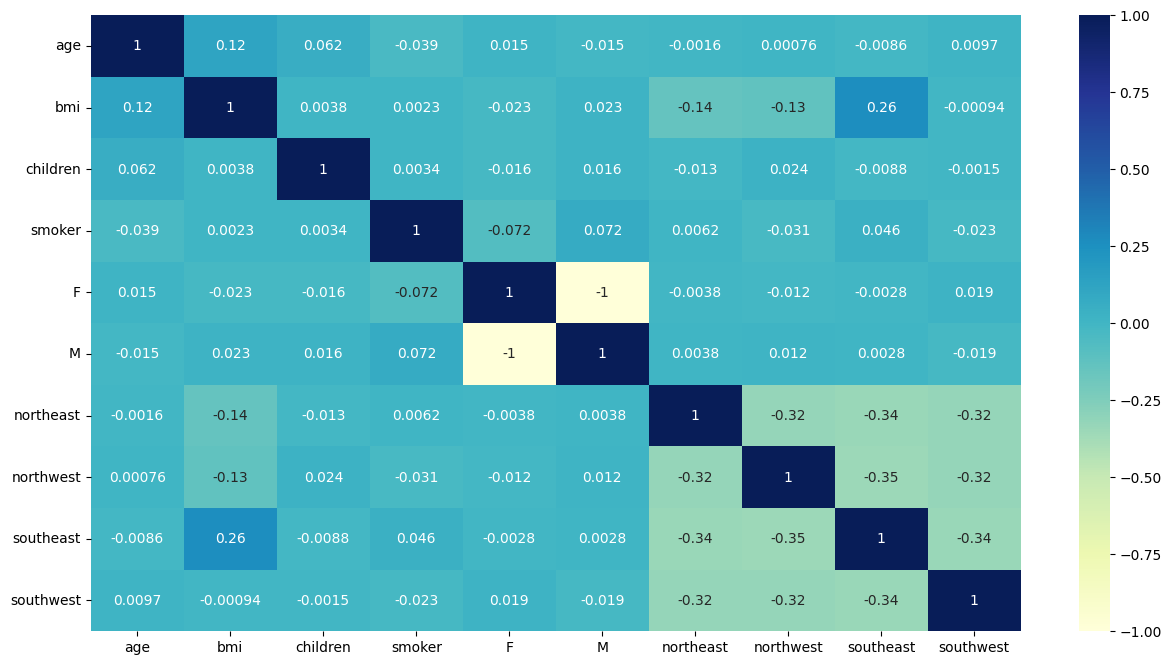

In [683]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15,8))
sns.heatmap(X.corr(), annot=True, cmap='YlGnBu')

In [684]:
scaler = StandardScaler()

X = scaler.fit_transform(X)

In [685]:
from sklearn.linear_model import LinearRegression

insurance_model = LinearRegression()

insurance_model.fit(X, y)

cv_results = cross_val_score(insurance_model, X, y, cv=5, scoring='r2')

r2_score = np.mean(cv_results)

In [686]:
r2_score

np.float64(0.7451005456450817)

In [687]:
validation_data_path = './data/validation_dataset.csv'
validation_data = pd.read_csv(validation_data_path)
validation_data.head()

,age,sex,bmi,children,smoker,region
0,18.0,female,24.090000,1.0,no,southeast
1,39.0,male,26.410000,0.0,yes,northeast
2,27.0,male,29.150000,0.0,yes,southeast
3,71.0,male,65.502135,13.0,yes,southeast
4,28.0,male,38.060000,0.0,no,southeast


In [688]:
validation_data['smoker'] = np.where(validation_data['smoker'] == 'yes', 1, 0)

validation_data['sex'] = np.where(validation_data['sex'].isin(['female', 'woman', 'F']), 'F', 'M')
sex_dummies = pd.get_dummies(validation_data['sex'])
validation_data = pd.concat([validation_data, sex_dummies], axis=1)
validation_data = validation_data.drop('sex', axis=1)

validation_data['region'] = validation_data['region'].str.lower()
region_dummies = pd.get_dummies(validation_data['region'])
validation_data = pd.concat([validation_data, region_dummies], axis=1)
validation_data = validation_data.drop('region', axis=1)

validation_data.loc[validation_data['children'] < 0, 'children'] = 0

validation_data = validation_data[validation_data['age'] > 0]

In [689]:
validation_data_scaled = scaler.transform(validation_data)

In [690]:
validation_data['predicted_charges'] = insurance_model.predict(validation_data_scaled)
validation_data.loc[validation_data['predicted_charges'] < 1000, 'predicted_charges'] = 1000

In [691]:
validation_data.head()

,age,bmi,children,smoker,F,M,northeast,northwest,southeast,southwest,predicted_charges
0,18.0,24.090000,1.0,0,True,False,False,False,True,False,1000.000000
1,39.0,26.410000,0.0,1,False,True,True,False,False,False,30945.709771
2,27.0,29.150000,0.0,1,False,True,False,False,True,False,27949.459771
3,71.0,65.502135,13.0,1,False,True,False,False,True,False,56329.959771
4,28.0,38.060000,0.0,0,False,True,False,False,True,False,7134.459771
